<font size=6><b>lec03. 머신러닝 기초

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
# ------------------------------------------------------

import warnings
warnings.filterwarnings(action="ignore")

# Data Load
* df.info()
* df.shape
* df.head()

In [2]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(data=data["data"], columns=data["feature_names"] )  #index=[]
df.columns = ["sl","sw","pl","pw"]
df['target'] = data["target"]
df.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   target  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
df.shape

(150, 5)

# EDA

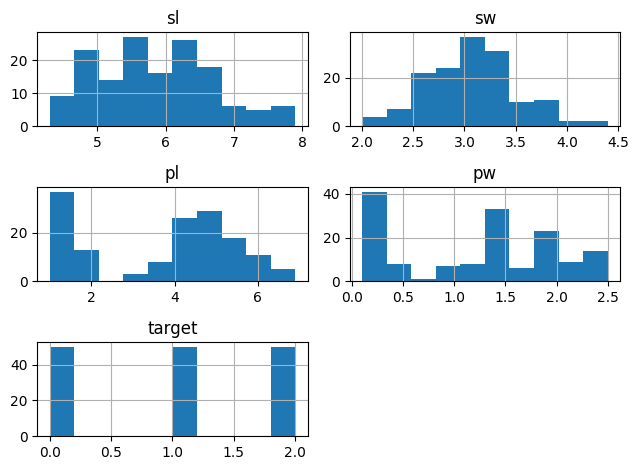

In [6]:
df.hist()
plt.tight_layout()
plt.show()

In [7]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 학습 & 예측 & 평가

In [8]:
df.head(3)

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## train, test 분리
* train_test_split( 문제지 , 답안지 , test_size=0.2,   train_size=0.8)

In [9]:
y답안지 = df['target']
X문제지 = df.drop(['target'], axis=1)

X_train문제지8, X_test문제지2,     y_train답안지8, y_test답안지2 = train_test_split( X문제지 , y답안지 , test_size=0.2, random_state=1211)
X_train문제지8.shape, X_test문제지2.shape,     y_train답안지8.shape, y_test답안지2.shape

((120, 4), (30, 4), (120,), (30,))

## 학습

``` python
class sklearn.tree.DecisionTreeClassifier(*, 
random_state=None,                                             
#--------------------- hyper-parameter
criterion='gini',                                         
max_depth=None, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
#---------------------
splitter='best', 
min_weight_fraction_leaf=0.0, max_features=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)[source]
```

In [10]:
model = DecisionTreeClassifier(random_state=111, min_samples_split=2)
model.fit( X_train문제지8,   y_train답안지8  )   # 학습 : 문제지 답지

DecisionTreeClassifier(random_state=111)

# 평가
* ref : https://scikit-learn.org/stable/modules/model_evaluation.html

<table class="docutils align-default" width=100%>
<thead>
<tr class="row-odd"><th class="head"><p>Scoring</p></th>
<th class="head"><p>Function</p></th>
<th class="head"><p>Comment</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><strong>Classification</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘accuracy’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score" title="sklearn.metrics.accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.accuracy_score</span></code></a></p></td>
<</a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘f1’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>for binary targets</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_micro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>micro-averaged</p></td>
</tr>
<tr class="row-even"><td><p>‘f1_macro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>macro-averaged</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>weighted average</p></td>
</tr>
<tr class="row-even"><td><p>‘f1_samples’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>by multilabel sample</p></td>
</tr>
<tr class="row-odd"><td><p>‘neg_log_loss’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss" title="sklearn.metrics.log_loss"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.log_loss</span></code></a></p></td>
<td><p>requires <code class="docutils literal notranslate"><span class="pre">predict_proba</span></code> support</p></td>
</tr>
<tr class="row-even"><td><p>‘precision’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score" title="sklearn.metrics.precision_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.precision_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p>‘recall’ etc.</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score" title="sklearn.metrics.recall_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.recall_score</span></code></a></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovr’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc_ovo’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovr_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc_ovo_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslattitle="sklearn.metrics.d2_tweedie_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.d2_tweedie_score</span></code></a></p></td>
<td></td>
</tr>
</tbody>
</table>

<pre>
<font size=4 color=red><b>
* accuracy        (정확도)

* precision_score (정밀도)   -- macro micro
* recall_score    (재현률)   -- macro micro
* f1_score                  -- macro micro

* roc_auc_score             -- ovo  ovr

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix,classification_report

In [12]:
예측답안지 = model.predict( X_test문제지2)  
accuracy_score(y_test답안지2,  예측답안지)

0.9666666666666667

## 오답체크

In [13]:
check_df = pd.DataFrame( columns=["y","pred"])
check_df["y"]    =  y_test답안지2
check_df["pred"] = 예측답안지
# check_df.head()
check_df[check_df["y"] != check_df["pred"]]

,y,pred
106,2,1


In [14]:
# y축(실제답안) 
# x축(예측답안) 
print(  confusion_matrix(y_test답안지2,  예측답안지)  )

[[ 9  0  0]
 [ 0 13  0]
 [ 0  1  7]]


<pre>
정밀도(precision)
    암이(P)라고 예측 --> 실제 암(P)
	TP / (TP+FP)   :  FP가 중요
	FP : 예측암      --> 실제정상
		 스팸메일분류기
재현률(recall)  
    실제 암(P)         --> 암이(P)라고 예측
    TP / (TP+FN)   :  FN이 중요
 	FN : 실제암--예측정상
	     암환자예측,화재감지,사기범죄탐지

가설&검정
귀무가설 : 일반적사실 (실제로참인데 귀무가설을 기각)
대립가설 : 검정하고자 하는 사실
     * Type 1(1종)오류 : (귀무가설이 참인데 귀무가설을 기각)
                         False Positive(FP)  = 거짓양성 =  α에러 = Type1에러
                         실제 음성(N)인데 --> 양성(N)으로 예측 실수!!!!
     * Type 2(2종)오류 :  (귀무가설이 거짓인데 귀무가설을 채택)
                         False Negative(FN)  = 거짓음성 =   β에러 = Type2에러
	                     실제 양성(P)인데 --> 음성(N)으로 예측 실수!!!!
정밀도(precision) : 암이(P)라고 예측 --> 실제 암(P)
		TP / (TP+FP)   :  FP
		FP : 예측암 --> 실제정상
		스팸메일분류기
재현률(recall)      : 실제 암(P)         --> 암이(P)라고 예측
                           TP / (TP+FN)   :  FN
 		FN : 실제암--예측정상
		암환자예측,화재감지,사기범죄탐지
가설&검정
귀무가설 : 일반적사실 (실제로참인데 귀무가설을 기각)
대림가설 : 검정하고자 하는 사실
     * Type 1(1종)오류 : (귀무가설이 참인데 귀무가설을 기각)
                   False Positive(FP)  = 거짓양성 =  α에러 = Type1에러
                   실제 음성(N)인데 --> 양성(N)으로 예측 실수!!!!
     * Type 2(2종)오류 :  (귀무가설이 거짓인데 귀무가설을 채택)
                   False Negative(FN)  = 거짓음성 =   β에러 = Type2에러
	     실제 양성(P)인데 --> 음성(N)으로 예측 실수!!!!                

## confusion_matrix(혼돈행렬)
* <img src="https://velog.velcdn.com/images%2Fhajeongjj%2Fpost%2F31affec5-a47b-4ff0-b07d-73943729dbc3%2Fimage.png" width=800>

<img src="https://docs.microsoft.com/en-us/dynamics365/finance/finance-insights/media/payment-prediction-matrix-2.png" width=600>

<table style="border-collapse: collapse; width: 805px; box-sizing: border-box; border-spacing: 0px; max-width: 100%;" border="0" width="805" cellspacing="0" cellpadding="0" data-ke-align="alignLeft"><colgroup><col style="width: 221pt;" width="294"> <col style="mso-width-source: userset; mso-width-alt: 6619; width: 136pt;" width="181"> <col style="width: 221pt;" width="294"> </colgroup>
<tbody>
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl63" style="height: 20px; width: 154px; border: 1px solid #8c8c8c;" width="294" height="20"><span>용어</span></td>
<td class="xl63" style="border-left: none; width: 88px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-top: 1px solid #8c8c8c; height: 20px;" width="181"><span>산출식</span></td>
<td class="xl63" style="border-left: none; width: 296px; border-bottom: 1px solid #8c8c8c; border-top: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" width="294"><span>설명</span></td>
<td class="xl63" style="border-left: none; width: 239px; border-bottom: 1px solid #8c8c8c; border-top: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" colspan="1" width="294"><span>&nbsp;예</span></td>
</tr>
    
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 35px; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">Accuracy </td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" width="181"><b>(TP+TN)/(TP+TN+FP+FN)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" width="294">탐지율 : 맞게 예측한 비율</td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" colspan="1" width="294"><span>실제 악성/정상인지 맞게 예측한 비율</span></td>
</tr>
    
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 20px; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">Precision <font size=5 color=red><b> ↓↓ </b></font></td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" width="181"><b>TP/(TP+FP)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" width="294"><span>정확도&nbsp;: P로 예측한 것중 실제P의 비율</span></td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" colspan="1" width="294"><span>악성으로 예측한것 중 실제 악성인 샘플의 비율</span></td>
</tr>
    
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 20px; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">Recall <font size=5 color=red><b> →→ </b></font></td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" width="181"><b>TP/(TP+FN)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" width="294"><span>재현율 : 실제 P를 P로 예측한 비율</span></td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 20px;" colspan="1" width="294"><span>실제 악성 샘플 중 악성으로 예측한 비율</span></td>
</tr>

    
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 15pt; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">TPR<span>&nbsp;(True Positive Rate)&nbsp;</span><span>= Recall</span>  <font size=5 color=red><b> →→ </b></font> </td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" width="181"><b>TP/(TP+FN)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" width="294"><span>민감도(Sensitivity) : 예측과 실제 모두 P&nbsp;</span></td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" colspan="1" width="294"><span>실제 악성 샘플을 악성으로 예측한 비율</span></td>
</tr>

<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 35px; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">Fall-out<font size=5 color=red><b> → </b></font></td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" width="181"><b>FP/(FP+TN)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" width="294">오예측율 : 실제 N을 P로 예측한 비율</td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" colspan="1" width="294"><span>실제 정상 샘플을 악성으로 예측한 비율</span></td>
</tr>    
    
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 15pt; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">FPR<span>&nbsp;(False Positive Rate)&nbsp;</span><span>= Fall-out</span> <font size=5 color=red><b> → </b></font></td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" width="181"><b>FP/(FP+TN)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" width="294"><span>실제 N인데 P로 예측</span></td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" colspan="1" width="294"><span>실제 정상 샘플을 악성으로 예측한 비율</span></td>
</tr>
 
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 35px; border-top: none; width: 154px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20"><span>TNR</span><br><span>&nbsp;(True Negative Rate)</span> <font size=5 color=red><b> ← </b></font></td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" width="181"><b>TN/(TN+FP)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" width="294"><span>특이도 : 예측과 실제 모두 N</span></td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c; height: 35px;" colspan="1" width="294"><span>실제 정상 샘플을 정상으로 예측한 비율</span></td>
</tr>
    
    
<tr style="height: 15.0pt; box-sizing: border-box;">
<td class="xl64" style="height: 15pt; border-top: none; width: 154px; box-sizing: border-box; border-right: 1px solid #8c8c8c; border-bottom: 1px solid #8c8c8c; border-left: 1px solid #8c8c8c;" width="294" height="20">FNR<span>&nbsp;(False Negative Rate)</span> <font size=5 color=red><b> ←← </b></font></td>
<td class="xl64" style="border-top: none; border-left: none; width: 88px; box-sizing: border-box; border-right: 1px solid #8c8c8c; border-bottom: 1px solid #8c8c8c;" width="181"><b>FN/(TP+FN)</b></td>
<td class="xl65" style="border-top: none; border-left: none; width: 296px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" width="294"><span>실제 P인데 N으로 예측</span></td>
<td class="xl65" style="border-top: none; border-left: none; width: 239px; border-bottom: 1px solid #8c8c8c; border-right: 1px solid #8c8c8c;" colspan="1" width="294"><span>실제 악성 샘플을 정상으로 예측한 비율</span></td>
</tr>
    

</tbody>
</table>

## 이진분류(Binary Classsification)

In [15]:
y    = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]
# cm = np.array([[9,1], [2,4]])
print(  confusion_matrix(y,  pred)  )
# array([[9, 1],
       # [2, 4]])

[[9 1]
 [2 4]]


In [16]:
print( classification_report(y, pred) )

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.80      0.67      0.73         6

    accuracy                           0.81        16
   macro avg       0.81      0.78      0.79        16
weighted avg       0.81      0.81      0.81        16



In [17]:
recall    = 4 / (2 + 4)
precision = 4 / (1+4)
fallout   = 1 / (9+1)
recall, precision, fallout

(0.6666666666666666, 0.8, 0.1)

In [18]:
precision = precision_score(y, pred)
recall    = recall_score(y, pred)
f1        = f1_score(y, pred)
print(f"precision:{precision:.4f}  recall:{recall:.4f}   f1:{f1:.4f}")

precision:0.8000  recall:0.6667   f1:0.7273


## ROC AUC
<img width=300 src="https://1.bp.blogspot.com/-cRcY8NBcFKg/XcDdlxe3y-I/AAAAAAAAAjE/LWpuRdpgZjEHjl-TAqJlVSz7LXh9hujWgCLcBGAsYHQ/s1600/roc_curve_python.png">

<pre>
ROC_CURV() : 양성(P)에 대한 정답(T)/오답(F) 비율   
ROC_AUC_SCORE() : ROC 커브 아래 면적값
    
specificity(특이도) 
    : TN / (TN + FP)
	: TNR(True Negative Rate)
	: 실제로 정상인데 예측이 정상

X축 : FPR = 1 - 특이도(TNR)    FP / (TN+FP) =  P틀림/정상인(N전체)
Y축 : TPR = 재현률(recall)     TP / (FN+TP) =  P맞춤/암환자(P전체)

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

```python
sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)[source]

y_score : probability estimates of the positive class
```

In [20]:
df = pd.read_csv("./lec06.diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 멀티분류(Multinomial Classsification)

In [21]:
y    = [0, 0, 1, 1, 1, 1, 2, 2]
pred = [0, 0, 0, 1, 1, 1, 1, 2]
print(  confusion_matrix(y,  pred)  )

[[2 0 0]
 [1 3 0]
 [0 1 1]]


In [22]:
print( classification_report(y, pred) )

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.75      0.75      0.75         4
           2       1.00      0.50      0.67         2

    accuracy                           0.75         8
   macro avg       0.81      0.75      0.74         8
weighted avg       0.79      0.75      0.74         8



In [23]:
precision = precision_score(y, pred , average="macro")
recall    = recall_score(y, pred    , average="macro")
f1        = f1_score(y, pred        , average="macro")
print(f"precision:{precision:.4f}  recall:{recall:.4f}   f1:{f1:.4f}")

precision:0.8056  recall:0.7500   f1:0.7389


In [24]:
(1+0.75+0.5) / 3

0.75

In [25]:
precision = precision_score(y, pred , average="micro")
recall    = recall_score(y, pred    , average="micro")
f1        = f1_score(y, pred        , average="micro")
print(f"precision:{precision:.4f}  recall:{recall:.4f}   f1:{f1:.4f}")

precision:0.7500  recall:0.7500   f1:0.7500


### macro vs. micro

<img src="https://euriion.com/wp-content/uploads/2023/08/image-19.png">

In [26]:
y    = [0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1,1,  2,2,2,2,2,2,2,2,2 ]
pred = [0,0,0,0,1,2, 0,0,0,0,0,0,1,1,2,2,  0,0,0,2,2,2,2,2,2 ]
print(  confusion_matrix(y,  pred)  )
print( classification_report(y, pred) )

[[4 1 1]
 [6 2 2]
 [3 0 6]]
              precision    recall  f1-score   support

           0       0.31      0.67      0.42         6
           1       0.67      0.20      0.31        10
           2       0.67      0.67      0.67         9

    accuracy                           0.48        25
   macro avg       0.55      0.51      0.47        25
weighted avg       0.58      0.48      0.46        25



In [27]:
precision = precision_score(y, pred , average="micro")
recall    = recall_score(y, pred    , average="micro")
f1        = f1_score(y, pred        , average="micro")
print(f"precision:{precision:.4f}  recall:{recall:.4f}   f1:{f1:.4f}")

precision:0.4800  recall:0.4800   f1:0.4800


In [28]:
print(  confusion_matrix(y,  pred)  )

[[4 1 1]
 [6 2 2]
 [3 0 6]]


In [29]:
# micro precision
TP = 4+2+6         #12
FP = 6+3+1+0+1+2   #13
print( TP, FP )
print( TP/(TP+FP) )

12 13
0.48


In [30]:
precision = precision_score(y, pred , average="macro")
recall    = recall_score(y, pred    , average="macro")
f1        = f1_score(y, pred        , average="macro")
print(f"precision:{precision:.4f}  recall:{recall:.4f}   f1:{f1:.4f}")

precision:0.5470  recall:0.5111   f1:0.4651


In [31]:
# macro precision
(0.31+0.67+0.67)/3

0.5499999999999999

## ROC AUC
<img width=300 src="https://1.bp.blogspot.com/-cRcY8NBcFKg/XcDdlxe3y-I/AAAAAAAAAjE/LWpuRdpgZjEHjl-TAqJlVSz7LXh9hujWgCLcBGAsYHQ/s1600/roc_curve_python.png">

<pre>
ROC_CURV() : 양성(P)에 대한 정답(T)/오답(F) 비율   
ROC_AUC_SCORE() : ROC 커브 아래 면적값
    
specificity(특이도) 
    : TN / (TN + FP)
	: TNR(True Negative Rate)
	: 실제로 정상인데 예측이 정상

X축 : FPR = 1 - 특이도(TNR)    FP / (TN+FP) =  P틀림/정상인(N전체)
Y축 : TPR = 재현률(recall)     TP / (FN+TP) =  P맞춤/암환자(P전체)

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

```python
sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)[source]

y_score : probability estimates of the positive class
```

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=11)
model.fit( X_train문제지8,   y_train답안지8  )   # 학습 : 문제지 답지
pred = model.predict( X_test문제지2)  
proba = model.predict_proba(X_test문제지2)  
print( pred[:3]  )
print( proba[:3] )

[1 0 1]
[[2.18559132e-02 9.41590563e-01 3.65535237e-02]
 [9.63727163e-01 3.62726337e-02 2.03141912e-07]
 [2.46210278e-02 9.21881822e-01 5.34971505e-02]]


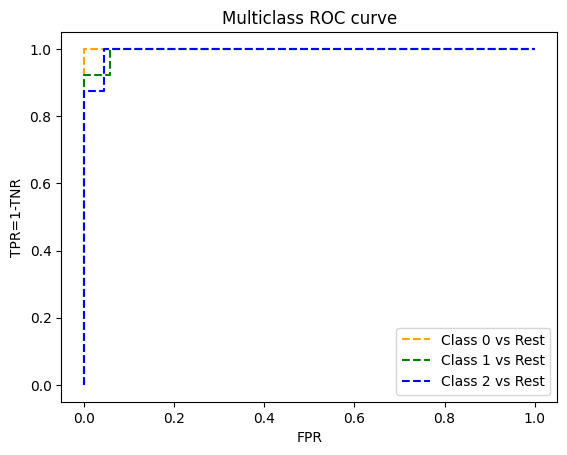

In [34]:
model = LogisticRegression().fit(X_train문제지8,   y_train답안지8)
pred = model.predict(X_test문제지2)
proba = model.predict_proba(X_test문제지2)
#fval = model.decision_function(X_test문제지2)
#print(pred.shape, fval.shape)

# roc curve for classes
fpr = {}
tpr = {}
th  = {}

n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], th[i] = roc_curve(y_test답안지2, proba[:,i], pos_label=i)

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green' , label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue'  , label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR=1-TNR')
plt.legend()
plt.show()